In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [96]:
df = pd.read_csv('historic.csv')

In [97]:
df.head()

,item_no,category,main_promotion,color,stars,success_indicator
0,739157,Tunic,Catalog,Green,3.1,flop
1,591846,Hoodie,Category_Highlight,Red,1.5,flop
2,337574,Sweatshirt,Catalog,Red,4.4,top
3,401933,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,812151,Hoodie,Category_Highlight,Green,4.1,top


In [98]:
df.describe()

,item_no,stars
count,8000.000000,8000.000000
mean,546474.338375,3.473075
std,256513.463874,0.978810
min,100171.000000,0.300000
25%,325001.500000,2.800000
50%,547081.000000,3.500000
75%,764312.250000,4.200000
max,989740.000000,6.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


# Checking for null values

In [6]:
df.isnull().value_counts()

item_no  category  main_promotion  color  stars  success_indicator
False    False     False           False  False  False                8000
dtype: int64

No null values present

# Checking for duplicated values in dataset.

In [102]:
df.duplicated().value_counts()

False    8000
dtype: int64

#Checking for missing values

No duplicate values present

In [101]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64


No missing values in dataset

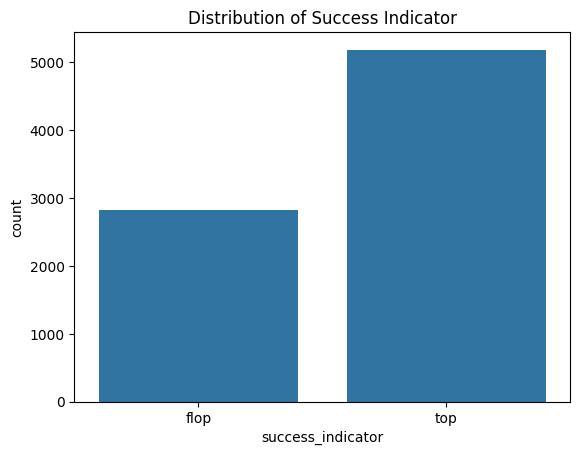

In [159]:
sns.countplot(x='success_indicator', data=df)
plt.title('Distribution of Success Indicator')
plt.show()

This visualization provides an easy-to-understand overview of the distribution of success indicators within the historic dataset, allowing viewers to quickly grasp the balance or imbalance between successful and unsuccessful products.

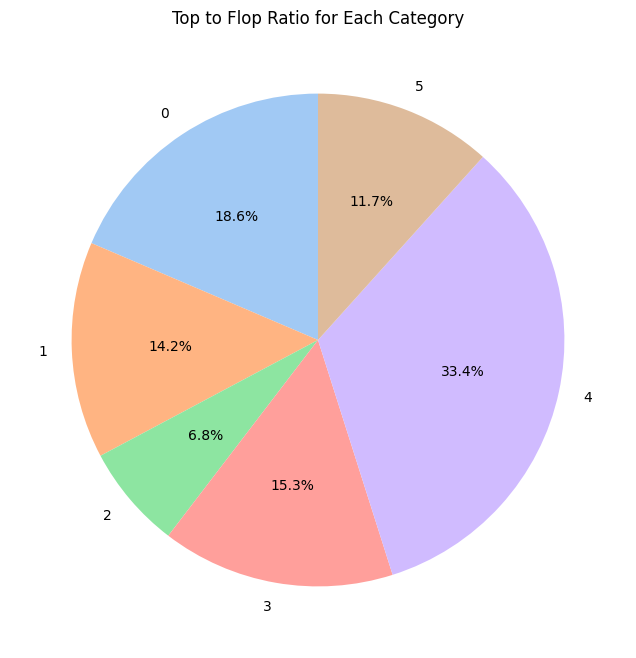

In [165]:
category_ratios = df.groupby(['category', 'success_indicator']).size().unstack().fillna(0)
category_ratios['ratio_top_to_flop'] = category_ratios['top'] / (category_ratios['flop'] + 1)  # Adding 1 to avoid division by zero

plt.figure(figsize=(10, 8))
plt.pie(category_ratios['ratio_top_to_flop'], labels=category_ratios.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Top to Flop Ratio for Each Category')
plt.show()

This visualization effectively communicates the ratio of 'TOP' to 'FLOP' for each product category, allowing viewers to quickly identify categories with higher success rates relative to others.

# Analysis on 'item_no' column

In [10]:
df['item_no'].describe()

count      8000.000000
mean     546474.338375
std      256513.463874
min      100171.000000
25%      325001.500000
50%      547081.000000
75%      764312.250000
max      989740.000000
Name: item_no, dtype: float64

In [11]:
df['item_no'].duplicated().value_counts()

False    8000
Name: item_no, dtype: int64

Since the 'item_no' column has high variance or all values are unique we can drop this feature, as it will not help us in
     predicting output

In [103]:
df = df[['category','main_promotion','color','stars','success_indicator']]

In [104]:
df.head()

,category,main_promotion,color,stars,success_indicator
0,Tunic,Catalog,Green,3.1,flop
1,Hoodie,Category_Highlight,Red,1.5,flop
2,Sweatshirt,Catalog,Red,4.4,top
3,Polo-Shirt,Category_Highlight,Blue,3.1,flop
4,Hoodie,Category_Highlight,Green,4.1,top


# Analysis on category column

In [14]:
df['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

Total six categories are present: Tunic, Polo-Shirt, T-Shirt, Sweatshirt, Blouse and Hoodie.
Here as features datatype is categorical we have to convert it into numerical datatype as our model understand only numerical values.

In [105]:
from sklearn.preprocessing import LabelEncoder
encoded_category1 = le1.fit_transform(df['category'])
print(encoded_category1)

[5 1 3 ... 4 0 3]


In [106]:
df['category'] = encoded_category1

In [107]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [21]:
encoded_values1 = le1.transform(encoded_categories1)
category_mapping1 = dict(zip(encoded_categories1, encoded_values1))
for category1, value1 in category_mapping1.items():
    print(f"Encoded Category: {category1}, Encoded Value: {value1}")

Encoded Category: 0, Encoded Value: 0
Encoded Category: 1, Encoded Value: 1
Encoded Category: 2, Encoded Value: 2
Encoded Category: 3, Encoded Value: 3
Encoded Category: 4, Encoded Value: 4
Encoded Category: 5, Encoded Value: 5


In [22]:
pd.crosstab(df['category'], df['success_indicator'])

success_indicator,flop,top
category,,
0,363,883
1,258,481
2,817,729
3,453,907
4,271,1188
5,653,997


Based on biivariate analysis we can conclude that the success indicator  of 'T-shirt' is huge among all categories which is good for buisness while  in relative sense polo-shirt went flop more compared to their sucess in market

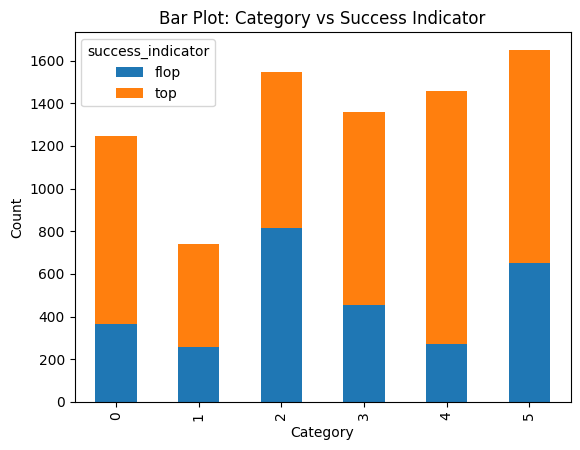

In [109]:
cross_tab = pd.crosstab(df['category'], df['success_indicator'])
cross_tab.plot.bar(stacked=True)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()

This stacked bar plot visualizes the relationship between the 'category' variable and the 'success_indicator' variable, showing the distribution of success indicators within each category.

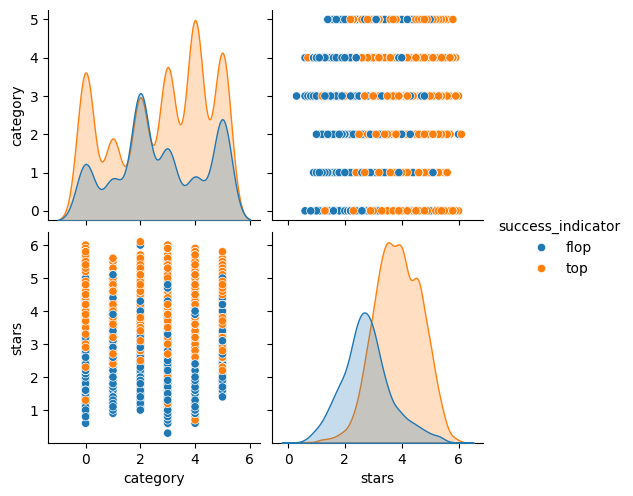

In [114]:
sns.pairplot(df, hue='success_indicator')
plt.show()

This is a grid of scatterplots where each variable in the DataFrame is plotted against every other variable, with points colored based on the values of the 'success_indicator' variable. This allows for visual exploration of relationships between variables and how they relate to the success indicators.

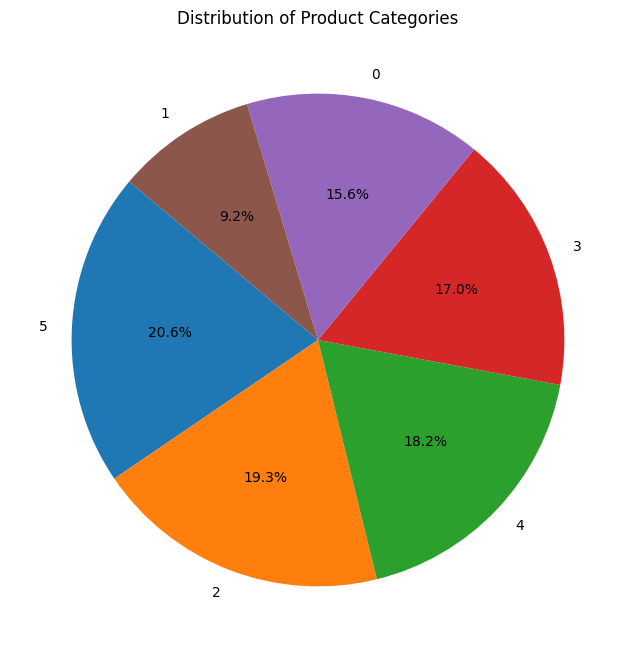

In [115]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Product Categories')
plt.show()


This  pie chart shows the distribution of product categories in the DataFrame 'df' and visualizes it using a pie chart. First, it calculates the count of each unique category using the value_counts() method, storing the results in the variable 'category_counts'.





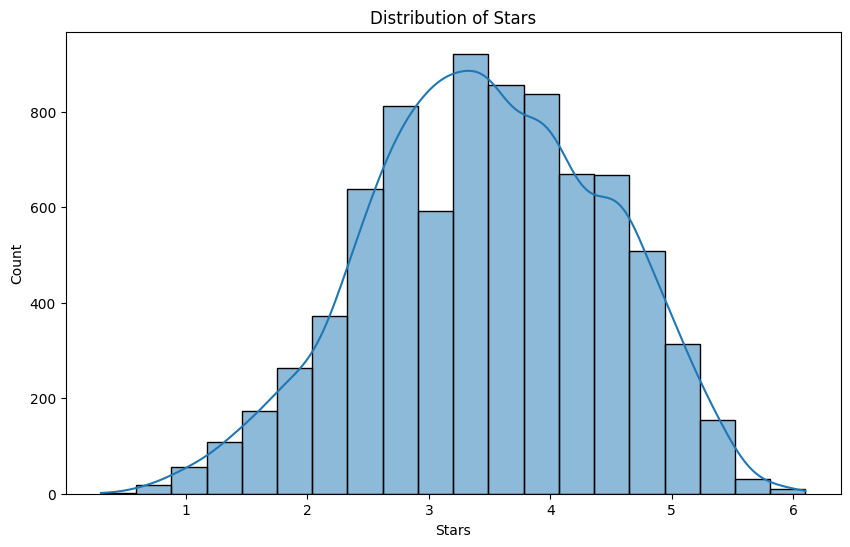

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=20, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.show()

The resulting plot is displayed with a title "Distribution of Stars" and labeled x-axis indicating 'Stars', allowing us to understand the distribution of review ratings (stars) across the dataset. The use of both histogram bars and KDE curve offers a comprehensive view of the data distribution.

# Analysis on : main_promotion feature

In [30]:
df['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

Here for promotion of these product company used 4 types: Category_Highlight, Catalog, Frontpage_Header,
Display_Ad_Campaign

In [123]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(df['main_promotion'])
print(encoded_main_promotion)

[0 1 0 ... 1 1 2]


In [32]:
df['main_promotion'] = encoded_main_promotion

In [33]:
encoded_categories_mp = le2.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [124]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2))
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [125]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2

success_indicator,flop,top
main_promotion,,
Catalog,953,1293
Category_Highlight,930,1502
Display_Ad_Campaign,335,974
Frontpage_Header,597,1416


It is clearly observed that the success rate is
57% for Catalog
61% Category_Highlight
74% Display_Ad_Campaign
70% Frontpage_Header
Hence as per these bivariate analysis company should focus on Display_Ad_Campaign and Frontpage_Header promotions more
and other two as lesser when compared.

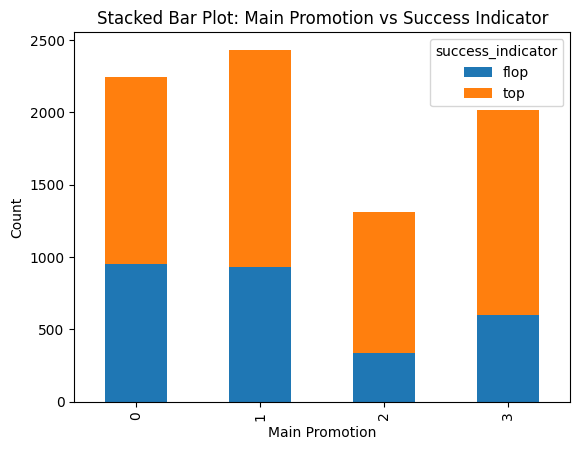

In [36]:
cross_tab2 = pd.crosstab(df['main_promotion'], df['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

This visualization effectively illustrates how the success indicators ('top' or 'flop') are distributed across different main promotion categories, enabling viewers to identify patterns and insights regarding the effectiveness of various promotional strategies.

# Analysis of color column

In [41]:
df['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(df['color'])
print(encoded_color)

[3 7 7 ... 9 1 1]


In [132]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3))
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")

Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


In [129]:
encoded_color_class = le3.classes_
encoded_color_class

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

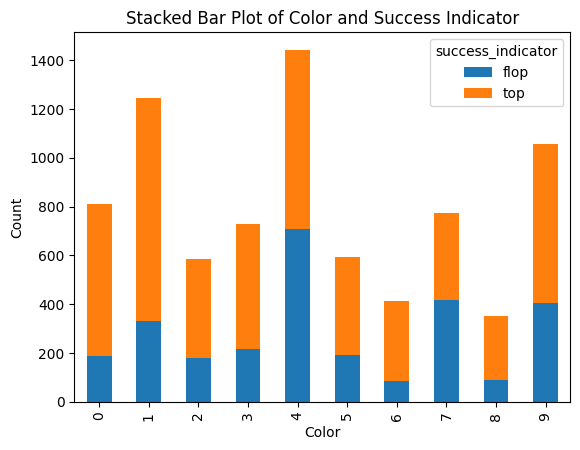

In [134]:
ct = pd.crosstab(df['color'], df['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

This visualization effectively illustrates how the success indicators ('top' or 'flop') are distributed across different colors, enabling viewers to identify patterns and insights regarding the relationship between color and success indicators in the dataset.

# Analysis on :  stars feature

In [59]:
# Change data type of "Stars" from object to float
df['stars'] = df['stars'].astype(float)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [61]:
df['stars'] = np.where(df['stars'] <= 3, 0, df['stars'])

1st BIN where star <=3 will assign them as 0 as most of them are 'FLOP'

In [62]:
df['stars'] = np.where(df['stars'] > 3, 1, df['stars'])

2nd BIN where star > 3 will assign them as 1 as most of them are 'TOP'

In [63]:
df['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

# Analysis on :  success_indicator feature

In [68]:
df['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [69]:
encoder = LabelEncoder()
df['success_indicator'] = encoder.fit_transform(df['success_indicator'])

In [70]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [72]:
df.shape

(8000, 5)

Checking for Balancing and imbalancing of dataframe

In [74]:
df['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [75]:
(2815/8000)*100

35.1875

In [76]:
(5185/8000)*100

64.8125

35% of data belongs to 'FLOP'/0 class & # 65% of data belongs to 'TOP'/1 class

Hence data is imbalanced as data for 'FLOP' catagory / class is nearly half of 'TOP' class / category in Target feature.


In [152]:
from imblearn.over_sampling import SMOTE
x = df.drop('success_indicator', axis=1)
y = df['success_indicator']

In [150]:
df_balanced.head()

,category,main_promotion,color,stars,success_indicator
0,5,0,3,1.0,0
1,1,1,7,0.0,0
2,3,0,7,1.0,1
3,2,1,1,1.0,0
4,1,1,3,1.0,1


In [153]:
df_balanced.shape

(10370, 5)

In [154]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

Hence the data is now balanced with all values encoded in numbers which is required for model building.

# EDA Report:


Univariate Analysis:

'item_no': Due to high variance (likely unique values), this feature is dropped as it offers no predictive value.

'Category': The dataset encompasses 6 product categories. Conversion to numerical format is necessary for model compatibility.

'main_promotion': Four primary promotion methods are utilized, requiring encoding for numerical representation.

'Color': Ten different colors are present in the dataset. Similar to 'Category', encoding is needed for numerical analysis.

'Success_Indicator': The dataset exhibits class imbalance, with 'TOP' instances outnumbering 'FLOP'. This column serves as the target feature for binary classification tasks.

Bivariate Analysis:

'item_no' vs. 'Success_Indicator': No discernible relationship is observed, justifying the removal of 'item_no' from further analysis.

'Category' vs. 'Success_Indicator': 'T-shirt' emerges as the most successful category, while 'Polo-shirt' shows relatively lower success rates.

'main_promotion' vs. 'Success_Indicator': 'Display_Ad_Campaign' and 'Frontpage_Header' promotions yield the highest success rates, indicating their effectiveness in driving sales.

'Color' vs. 'Success_Indicator': Certain colors, such as 'Black', 'Blue', and 'White', are associated with higher success rates compared to others.

'stars' vs. 'Success_Indicator': Products with higher star ratings (>3) demonstrate significantly higher success rates, suggesting that customer ratings play a crucial role in product acceptance.